In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
RFM_data = pd.read_excel('data\\RFM_data.xlsx')
RFM_data.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346,326,1,77183.60
1,12747,3,11,4196.01
2,12748,1,211,34345.00
3,12749,4,5,4090.88
4,12820,4,4,942.34


In [3]:
RFM_data.shape

(3920, 4)

In [4]:
RFM_data.set_index('CustomerID', inplace=True)
RFM_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,326,1,77183.60
12747,3,11,4196.01
12748,1,211,34345.00
12749,4,5,4090.88
12820,4,4,942.34


## RFM Customer Segmentation 

In [5]:
RFM = RFM_data.copy()

In [6]:
RFM.describe()

,Recency,Frequency,MonetaryValue
count,3920.000000,3920.000000,3920.000000
mean,92.742092,4.253827,1868.618027
std,99.533485,7.225604,7495.864998
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,300.280000
50%,51.000000,2.000000,653.285000
75%,143.000000,5.000000,1579.235000
max,374.000000,211.000000,259657.300000


In [7]:
RFM['Recency_score'] = pd.qcut(RFM_data.Recency, 4, labels = [4, 3, 2, 1]).values

RFM['Frequency_score'] = pd.cut(RFM_data.Frequency, bins=[-1,np.percentile(RFM_data.Frequency, 25), \
                                                             np.percentile(RFM_data.Frequency, 50), \
                                                             np.percentile(RFM_data.Frequency, 75), \
                                                             RFM_data.Frequency.max()], labels=[1, 2, 3, 4]).astype("int")
RFM['MonetaryValue_score'] = pd.qcut(RFM_data.MonetaryValue, 4, labels = [1,2,3,4]).values

In [8]:
RFM.head(20)

,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,MonetaryValue_score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,4
12747,3,11,4196.01,4,4,4
12748,1,211,34345.00,4,4,4
12749,4,5,4090.88,4,3,4
12820,4,4,942.34,4,3,3
12821,215,1,92.72,1,1,1
12822,71,2,948.88,2,2,3
12823,75,5,1759.50,2,3,4
12824,60,1,397.12,2,1,2


In [9]:
RFM.dtypes

Recency                   int64
Frequency                 int64
MonetaryValue           float64
Recency_score          category
Frequency_score           int32
MonetaryValue_score    category
dtype: object

In [10]:
RFM['RFM_segment']=RFM.Recency_score.astype('int')*100 + RFM.Frequency_score*10 + RFM.MonetaryValue_score.astype('int')
RFM['RFM_score'] = RFM.Recency_score.astype('int') + RFM.Frequency_score + RFM.MonetaryValue_score.astype('int')
RFM.head()

,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,MonetaryValue_score,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6
12747,3,11,4196.01,4,4,4,444,12
12748,1,211,34345.00,4,4,4,444,12
12749,4,5,4090.88,4,3,4,434,11
12820,4,4,942.34,4,3,3,433,10


In [11]:
#top 10 largest segments
RFM['RFM_segment'].value_counts()[:10]

444    423
111    396
112    210
211    187
333    187
344    167
433    159
233    139
212    137
311    136
Name: RFM_segment, dtype: int64

In [12]:
#bottom 10 smallest segments
RFM['RFM_segment'].value_counts(ascending = True)[:10]

141    1
242    1
414    1
441    1
314    2
142    2
442    3
413    3
143    4
424    4
Name: RFM_segment, dtype: int64

In [13]:
# summary metrics for each RFM_score
RFM.groupby('RFM_score').agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_score                                      
3           265.5       1.0         158.6   396
4           184.7       1.1         280.7   454
5           110.5       1.3         363.6   443
6            90.3       1.7         704.1   407
7            76.6       2.3         698.8   374
8            58.7       3.0        1126.1   366
9            45.8       4.0        1401.8   409
10           30.0       5.2        2337.6   347
11           21.1       8.0        3476.3   301
12            7.7      15.8        8469.8   423

In [14]:
# define function to group customers into named segments: Gold, Silver and Bronze based on RFM_scores
def named_segments(df):
    if df.RFM_score >= 9:
        return 'Gold'
    elif df.RFM_score >= 5:
        return 'Silver'
    else:
        return 'Bronze'

In [15]:
# group customers into named segments 
RFM['Named_segments'] =RFM.apply(named_segments, axis=1)
RFM.head()

,Recency,Frequency,MonetaryValue,Recency_score,Frequency_score,MonetaryValue_score,RFM_segment,RFM_score,Named_segments
CustomerID,,,,,,,,,
12346,326,1,77183.60,1,1,4,114,6,Silver
12747,3,11,4196.01,4,4,4,444,12,Gold
12748,1,211,34345.00,4,4,4,444,12,Gold
12749,4,5,4090.88,4,3,4,434,11,Gold
12820,4,4,942.34,4,3,3,433,10,Gold


In [16]:
named_segment_count = RFM.groupby('Named_segments')['Named_segments'].count()
named_segment_count

Named_segments
Bronze     850
Gold      1480
Silver    1590
Name: Named_segments, dtype: int64

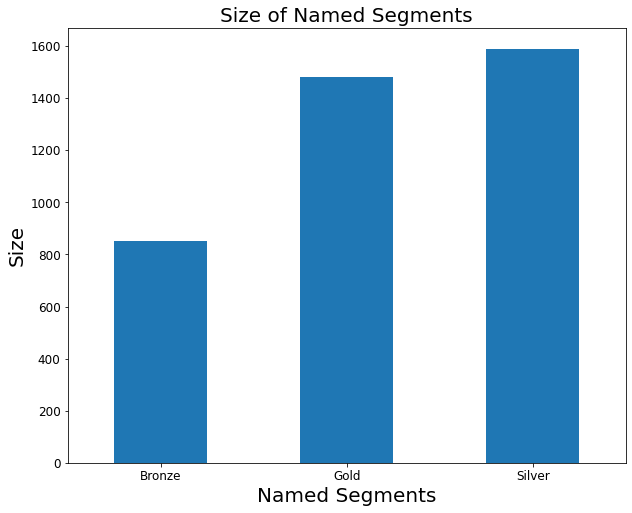

In [17]:
named_segment_count.plot(kind='bar', rot = 0, figsize=(10, 8))
#plt.yscale('log')
plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)
plt.title('Size of Named Segments', fontsize = 20)
plt.xlabel('Named Segments', fontsize = 20)
plt.ylabel('Size', fontsize = 20)
plt.show()

In [18]:
# summary metrics for each named segment
RFM.groupby('Named_segments').agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                  mean      mean          mean count
Named_segments                                      
Bronze           222.4       1.1         223.8   850
Gold              26.2       8.5        4063.3  1480
Silver            85.4       2.0         705.1  1590

## K-Means Clustering

In [19]:
# reduce skewness using logarithmic transformation
RFM_data_log = np.log(RFM_data)
RFM_data_log.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346,5.786897,0.000000,11.253942
12747,1.098612,2.397895,8.341889
12748,0.000000,5.351858,10.444212
12749,1.386294,1.609438,8.316515
12820,1.386294,1.386294,6.848366


In [20]:
RFM_data_log.describe()

,Recency,Frequency,MonetaryValue
count,3920.000000,3920.000000,3920.000000
mean,3.798750,0.946731,6.544480
std,1.382343,0.900914,1.247936
min,0.000000,0.000000,1.321756
25%,2.890372,0.000000,5.704715
50%,3.931826,0.693147,6.482013
75%,4.962845,1.609438,7.364696
max,5.924256,5.351858,12.467118


In [21]:
# centering and scaling data for modeling
scaler = StandardScaler()
RFM_data_normalized = scaler.fit_transform(RFM_data_log)

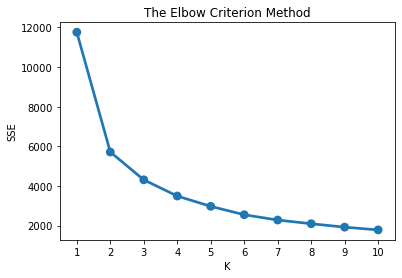

In [22]:
# use elbow criterion method to choose number of clusters
sse = {}
for k in range (1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 123)
    kmeans.fit(RFM_data_normalized)
    sse[k] = kmeans.inertia_
# plot SSE for each K
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('The Elbow Criterion Method')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

The best K = 2

In [23]:
# apply K-Means with  K = 2
kmeans = KMeans(n_clusters = 2, random_state = 123)
kmeans.fit(RFM_data_normalized)
cluster_labels = kmeans.labels_
RFM_k2 = RFM_data.assign(Cluster=cluster_labels)
RFM_k2.head(10)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,326,1,77183.60,0
12747,3,11,4196.01,0
12748,1,211,34345.00,0
12749,4,5,4090.88,0
12820,4,4,942.34,0
12821,215,1,92.72,1
12822,71,2,948.88,1
12823,75,5,1759.50,0
12824,60,1,397.12,1


In [24]:
# summary metrics for each cluster
# metrics based on named segments
RFM_k2.groupby('Cluster').agg({'Recency':'mean', 'Frequency':'mean', 'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          28.7       8.1        3957.2  1592
1         136.5       1.6         440.4  2328

In [25]:
#form DataFrame from RFM_data_normalized
RFM_normalized_df = pd.DataFrame(RFM_data_normalized, index=RFM_data.index, columns = RFM_data.columns)
RFM_normalized_df['Cluster']=RFM_k2['Cluster']
RFM_normalized_df.head(10)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12346,1.438428,-1.050990,3.774282,0
12747,-1.953555,1.610975,1.440489,0
12748,-2.748403,4.890245,3.125343,0
12749,-1.745416,0.735688,1.420154,0
12820,-1.745416,0.487971,0.243542,0
12821,1.137264,-1.050990,-1.614788,1
12822,0.335654,-0.281510,0.249085,1
12823,0.375308,0.735688,0.743967,0
12824,0.213863,-1.050990,-0.448992,1


In [26]:
RFM_normalized_melt = RFM_normalized_df.reset_index().melt(id_vars = ['CustomerID', 'Cluster'], \
                                                          value_vars=['Recency', 'Frequency', 'MonetaryValue'], \
                                                          var_name = 'RFM_type', value_name = 'Value')
RFM_normalized_melt.head(10)

,CustomerID,Cluster,RFM_type,Value
0,12346,0,Recency,1.438428
1,12747,0,Recency,-1.953555
2,12748,0,Recency,-2.748403
3,12749,0,Recency,-1.745416
4,12820,0,Recency,-1.745416
5,12821,1,Recency,1.137264
6,12822,1,Recency,0.335654
7,12823,0,Recency,0.375308
8,12824,1,Recency,0.213863
9,12826,0,Recency,-1.953555


In [27]:
RFM_normalized_melt.tail(10)

,CustomerID,Cluster,RFM_type,Value
11750,18273,0,MonetaryValue,-0.982836
11751,18274,1,MonetaryValue,-1.101519
11752,18276,1,MonetaryValue,-0.583266
11753,18277,1,MonetaryValue,-1.475064
11754,18278,1,MonetaryValue,-1.110775
11755,18280,1,MonetaryValue,-1.080478
11756,18281,1,MonetaryValue,-1.724872
11757,18282,1,MonetaryValue,-1.091874
11758,18283,0,MonetaryValue,0.883789
11759,18287,0,MonetaryValue,0.778634


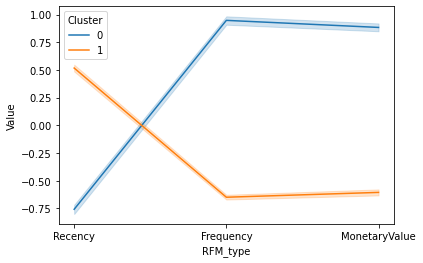

In [28]:
# plot of standardized RFM
sns.lineplot(x='RFM_type', y = 'Value', hue = 'Cluster', data = RFM_normalized_melt)
plt.show()